In [1]:
import sys,os
sys.path.append(os.path.abspath("../"))
sys.path.append(os.path.abspath('../modules/'))

import healpy as h
import multiprocessing as mp
from modules.settings import global_mmf_settings as gset
from data_preprocess import tiling_the_sphere as tts
from data_preprocess import tile_planck_data as tpd
from filters import modular_multi_matched_filter as mmf
from simulate import cluster_templates as cltemp

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
dataset="planck_pr3"
whichch="hfi"
mask_point_sources=False
numprocs=35

if whichch=="allch":
    chmin=30.
elif whichch=="hfi":
    chmin=100.

use_psf_data=True
ps_suffix="_inpainted_data"
if mask_point_sources:
    use_psf_data=False
    ps_suffix="_masked_data"
    
    
figstamp=dataset + "_" + whichch + ps_suffix
dir_suffix=whichch + ps_suffix

save_results=False
run_analysis=False

figstamp,dir_suffix

outpath="/results/" + dataset + "/planck_cat_" + dir_suffix + "/"
tempdatapath="/tempdata/" + dataset + "/planck_tiles/"
gset.setup_mmf_config(dataset=dataset,outpath=outpath,tempdatapath=tempdatapath,chmin=chmin,xsize=15.,do_band_pass=True,use_psf_data=use_psf_data)
figpath=gset.mmfset.paths["result_figs"]
datapath=gset.mmfset.paths["result_data"]

In [3]:
tile_map,fsky_map,apo_mask=tts.return_sky_tile_map()
tiledef=tpd.get_tangent_plane_fnames(fsky_map=fsky_map,fsky_thr=0.3)
h.mollview(tile_map)
filename=figpath + "tile_the_sky.pdf"
plt.savefig(filename,bbox_inches="tight",dpi=200)

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


<IPython.core.display.Javascript object>

In [4]:
len(tiledef.keys())

5

In [5]:
# tpd.extract_data_tiles(tiledef)

# def gen_ps_inpainted_data(px):
#     tpd.gen_ps_inpainted_data(px,tiledef)
    
# def parallel_psfill(numprocs):
#     pool=mp.Pool(processes=numprocs)
#     pool.map(gen_ps_inpainted_data,tiledef.keys())
#     pool.close()
#     pool.join()
    
# start=time.time()
# parallel_psfill(8)
# print time.time()-start

In [6]:
tmplt=cltemp.cluster_spectro_spatial_templates(T_step=1.,theta500_min=1.,theta500_max=100.,theta_step=2.)
tmplt.setup_templates()

In [7]:
from automated_detection import extract_tile_cluster_catalogue as etcc

In [ ]:
# for px in tiledef.keys():
#     etcc.extract_tile_cluster_catalogue(px,tiledef,tmplt)

In [ ]:
def wrap_extract_tile_cluster_catalogue(px):
    etcc.extract_tile_cluster_catalogue(px,tiledef,tmplt)

def parallel_etcc(numprocs):
    pool=mp.Pool(processes=numprocs)
    pool.map(wrap_extract_tile_cluster_catalogue,tiledef.keys())
    pool.close()
    pool.join()
    
start=time.time()
parallel_etcc(5)
print time.time()-start
    
summary_cat=etcc.return_final_cluster_catalogue(tiledef,verbose=False)

1.0000000000000002 8.20286335345518 73.86472225054928 8.20286335345518 73.86472225054928


/Users/adityarotti/Documents/Work/Projects/Relativistic-SZ/MMF-filters-for-rSZ-cluster-detection/Planck_MMF/analysis/modules/automated_detection/extract_tile_cluster_catalogue.py:179: RuntimeWarning: invalid value encountered in arccos
  beta=np.arccos(cosbeta)*180.*60./np.pi


1.0000000000000002 8.20286335345518 73.86472225054928 8.20286335345518 73.86472225054928
1.0000000000000002 8.20286335345518 73.86472225054928 8.20286335345518 73.86472225054928
1.0000000000000002 8.20286335345518 73.86472225054928 8.20286335345518 73.86472225054928
1.0000000000000002 8.20286335345518 73.86472225054928 8.20286335345518 73.86472225054928
1.0000000000000002 8.20286335345518 73.86472225054928 8.20286335345518 73.86472225054928


Process PoolWorker-5:
Traceback (most recent call last):
  File "/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/multiprocessing/pool.py", line 113, in worker
    result = (True, func(*args, **kwds))
  File "/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/multiprocessing/pool.py", line 65, in mapstar
    return map(*args)
  File "<ipython-input-9-1148a732504b>", line 2, in wrap_extract_tile_cluster_catalogue
    etcc.extract_tile_cluster_catalogue(px,tiledef,tmplt)
  File "/Users/adityarotti/Documents/Work/Projects/Relativistic-SZ/MMF-filters-for-rSZ-cluster-detection/Planck_MMF/analysis/modules/automated_detection/extract_t

<IPython.core.display.Javascript object>


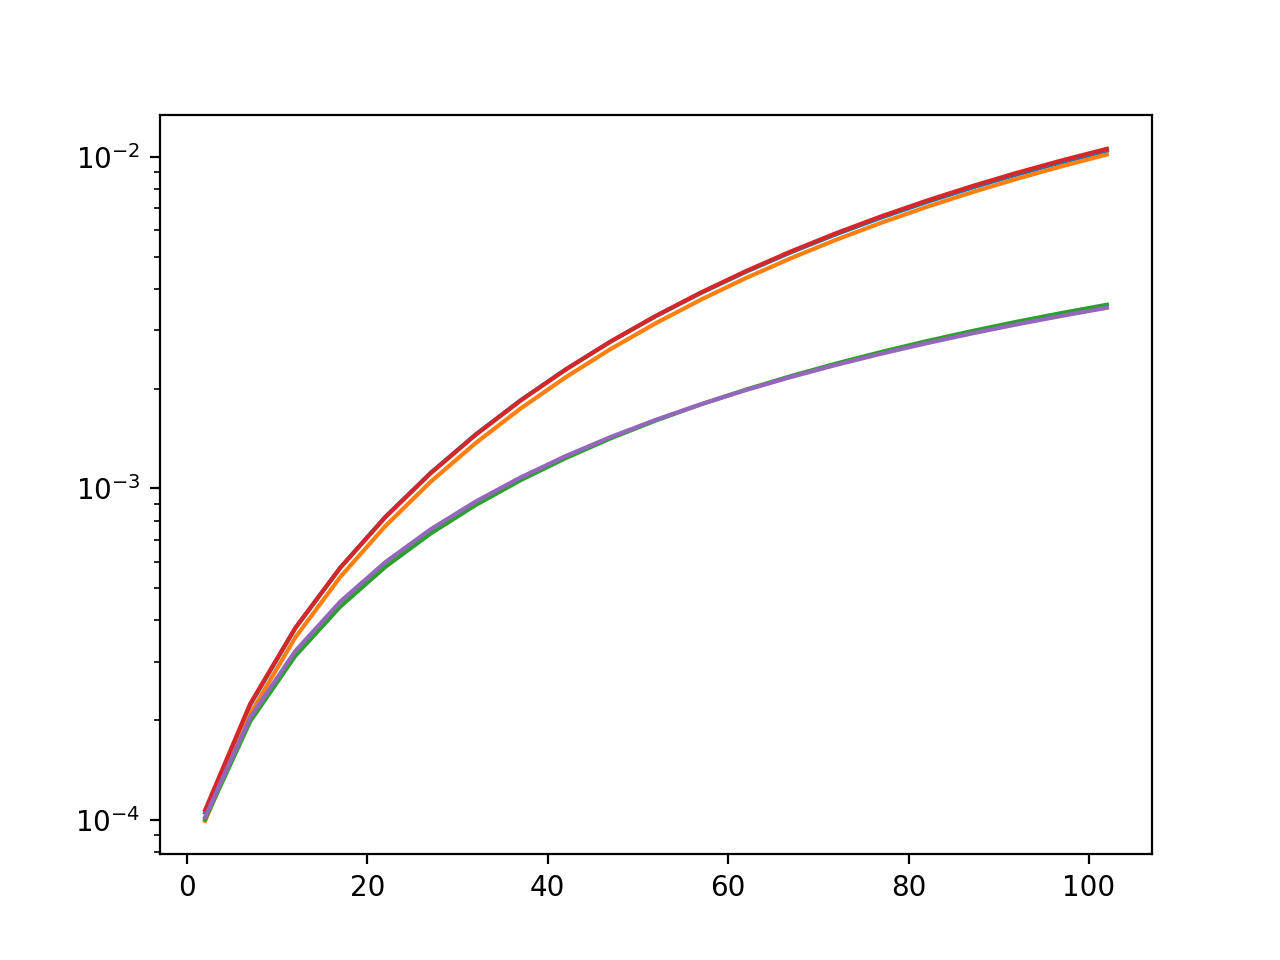

[]

In [119]:
figure()

for idx in tiledef.keys():
    tilename=tiledef[idx]["TILENAME"]
    catname=gset.mmfset.paths["result_data"] + tilename + ".dict"
    cat=etcc.read_dict(catname)
    plot(cat["theta500"],cat["err_Y500"])
semilogy()

<IPython.core.display.Javascript object>


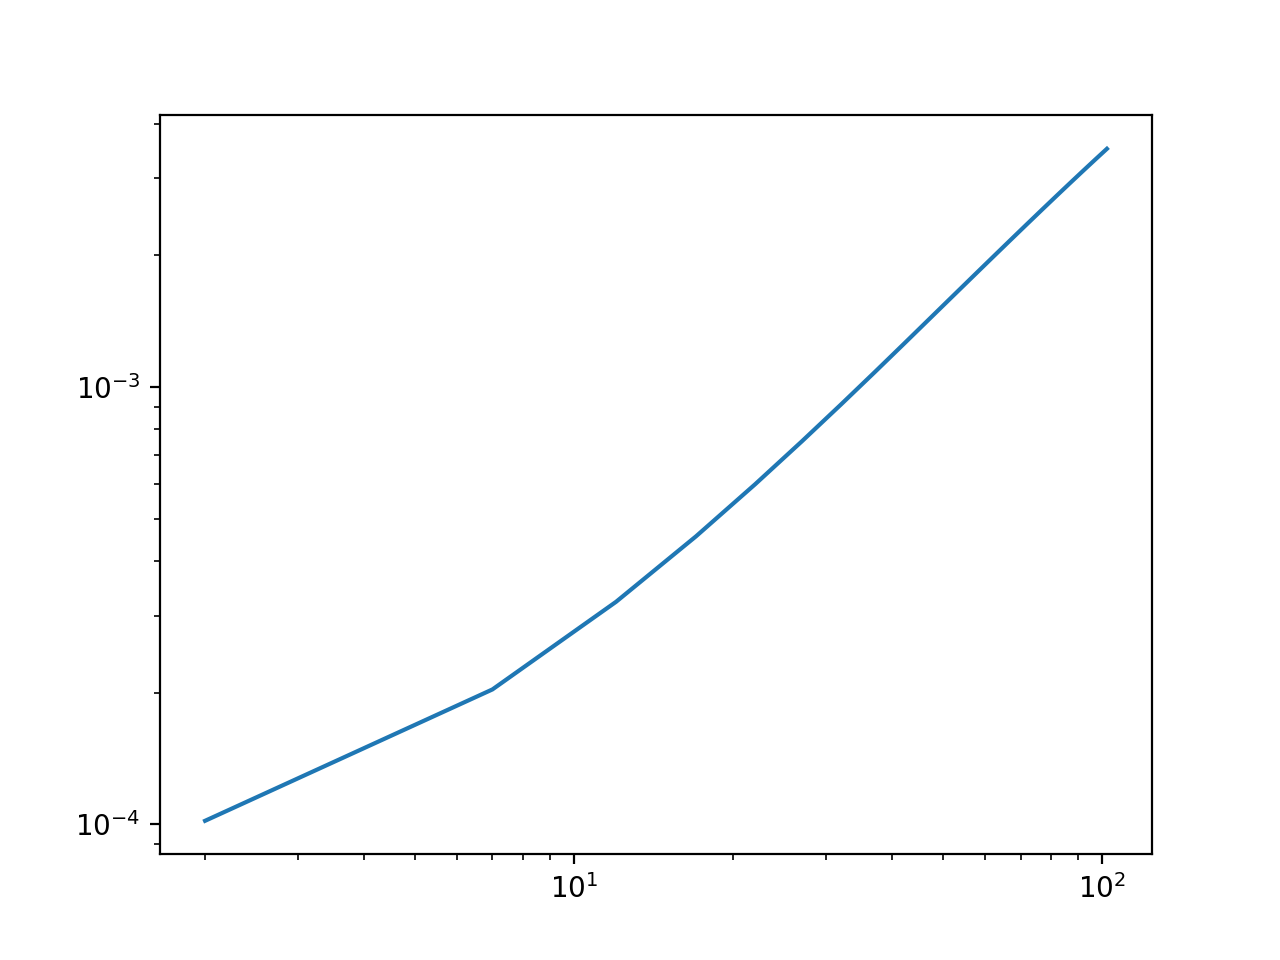

[]

<IPython.core.display.Javascript object>


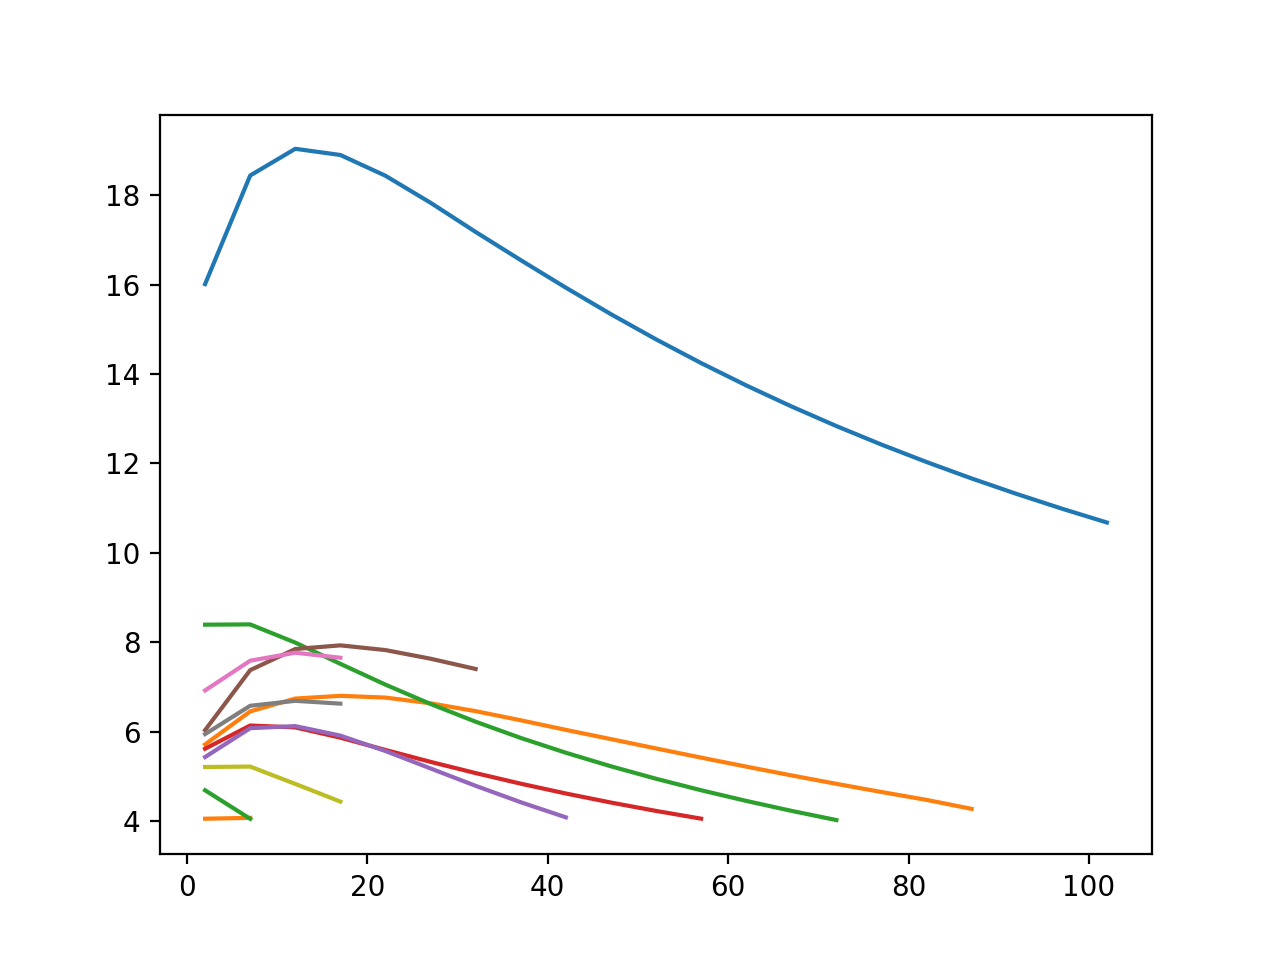

In [27]:
figure()
for idx in cat["cat"].keys():
    plot(cat["cat"][idx]["thetac"],cat["cat"][idx]["snr"])


In [28]:
cat["cat"][0].keys()

['yc',
 'err_yc',
 'snr',
 'thetac',
 'cart_coord',
 'gal_coord',
 'YR500',
 'err_YR500',
 'Y5R500',
 'err_Y5R500',
 'mp_yc',
 'mp_err_yc',
 'mp_snr',
 'mp_thetac',
 'mp_cart_coord',
 'mp_gal_coord',
 'mp_YR500',
 'mp_err_YR500',
 'mp_Y5R500',
 'mp_err_Y5R500']

In [30]:
summary_cat["Total clusters"]

70

<IPython.core.display.Javascript object>


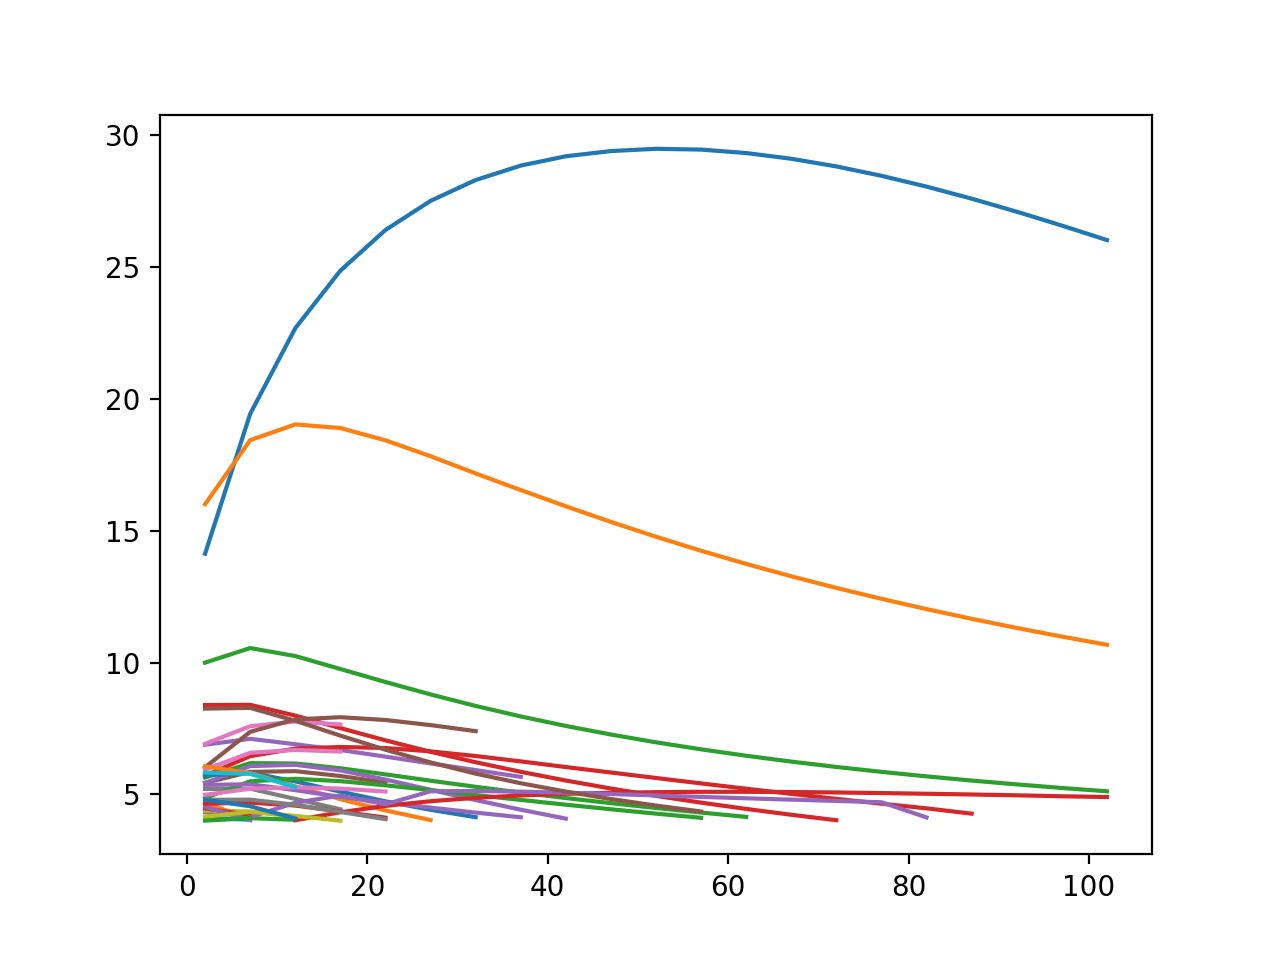

In [34]:
figure()
for idx in summary_cat["Catalogue"].keys():
    plot(summary_cat["Catalogue"][idx]["thetac"],summary_cat["Catalogue"][idx]["snr"])

In [107]:
from read_write_dict import write_dict
from read_write_dict import read_dict

def myprint(text,verbose):
    if verbose:
        print text
        
def return_distance(gal_coord1,gal_coord2):
    glon1,glat1=gal_coord1
    glon2,glat2=gal_coord2
    theta1=(90.-glat1)*np.pi/180.
    theta2=(90.-glat2)*np.pi/180.
    phi1=glon1*np.pi/180.
    phi2=glon2*np.pi/180.
    cosbeta=np.sin(theta1)*np.sin(theta2)*np.cos(phi2-phi1)+np.cos(theta1)*np.cos(theta2)
    beta=np.arccos(cosbeta)*180.*60./np.pi
    return beta

def return_final_cluster_catalogue(tiledef,verbose=False):
    tile_cluscat={}
    for px in tiledef.keys():
        tilename=tiledef[px]["TILENAME"]
        catname=gset.mmfset.paths["result_data"] + tilename + ".dict"
        temp_cat=read_dict(catname)
        tile_cluscat[tilename]=temp_cat["cat"]
	
    final_cat={}
    for tile in tile_cluscat.keys():
        for ict in tile_cluscat[tile].keys():
            nc=[]
            for jct in final_cat.keys():
                dist=return_distance(tile_cluscat[tile][ict]["mp_gal_coord"],final_cat[jct]["mp_gal_coord"])
                nc=nc + [dist<1*tile_cluscat[tile][ict]["mp_thetac"] or dist<1.*final_cat[jct]["mp_thetac"]]

            if any(nc):
                myprint("This cluster exists in the catalogue",verbose)
                match_ict=np.where(nc)[0][0]
                if tile_cluscat[tile][ict]["mp_snr"]>final_cat[match_ict]["mp_snr"]:
                    myprint("Updating the cluster definition",verbose)
                    final_cat[match_ict]=tile_cluscat[tile][ict]
            else:
                myprint("New cluster detected, adding to the cluster catalogue",verbose)
                match_ict=len(final_cat.keys())
                final_cat[match_ict]=tile_cluscat[tile][ict]
    cat_summary={}
    cat_summary["Total clusters"]=len(final_cat.keys())
    cat_summary["Catalogue"]=final_cat
    catname=gset.mmfset.paths["result_data"] + "full_sky_catalogue.dict"
    write_dict(catname,cat_summary)
    return cat_summary

In [108]:
summary_cat=return_final_cluster_catalogue(tiledef)
summary_cat["Total clusters"]

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in arccos


70

In [109]:
nside=2048
cluster_map=np.zeros(h.nside2npix(nside),dtype=np.float64)
for idx in summary_cat["Catalogue"].keys():
    glon,glat=summary_cat["Catalogue"][idx]["mp_gal_coord"]
    cpix=h.ang2pix(nside,glon,glat,lonlat=True)
    vec=h.pix2vec(nside,cpix)
    radius=(summary_cat["Catalogue"][idx]["mp_thetac"]/60.)*np.pi/180
#     radius=(60./60.)*np.pi/180
    neighpix=h.query_disc(nside,vec,radius)
    temp_map=np.zeros_like(cluster_map)
    temp_map[neighpix]=1.
    cluster_map=cluster_map + temp_map

<IPython.core.display.Javascript object>


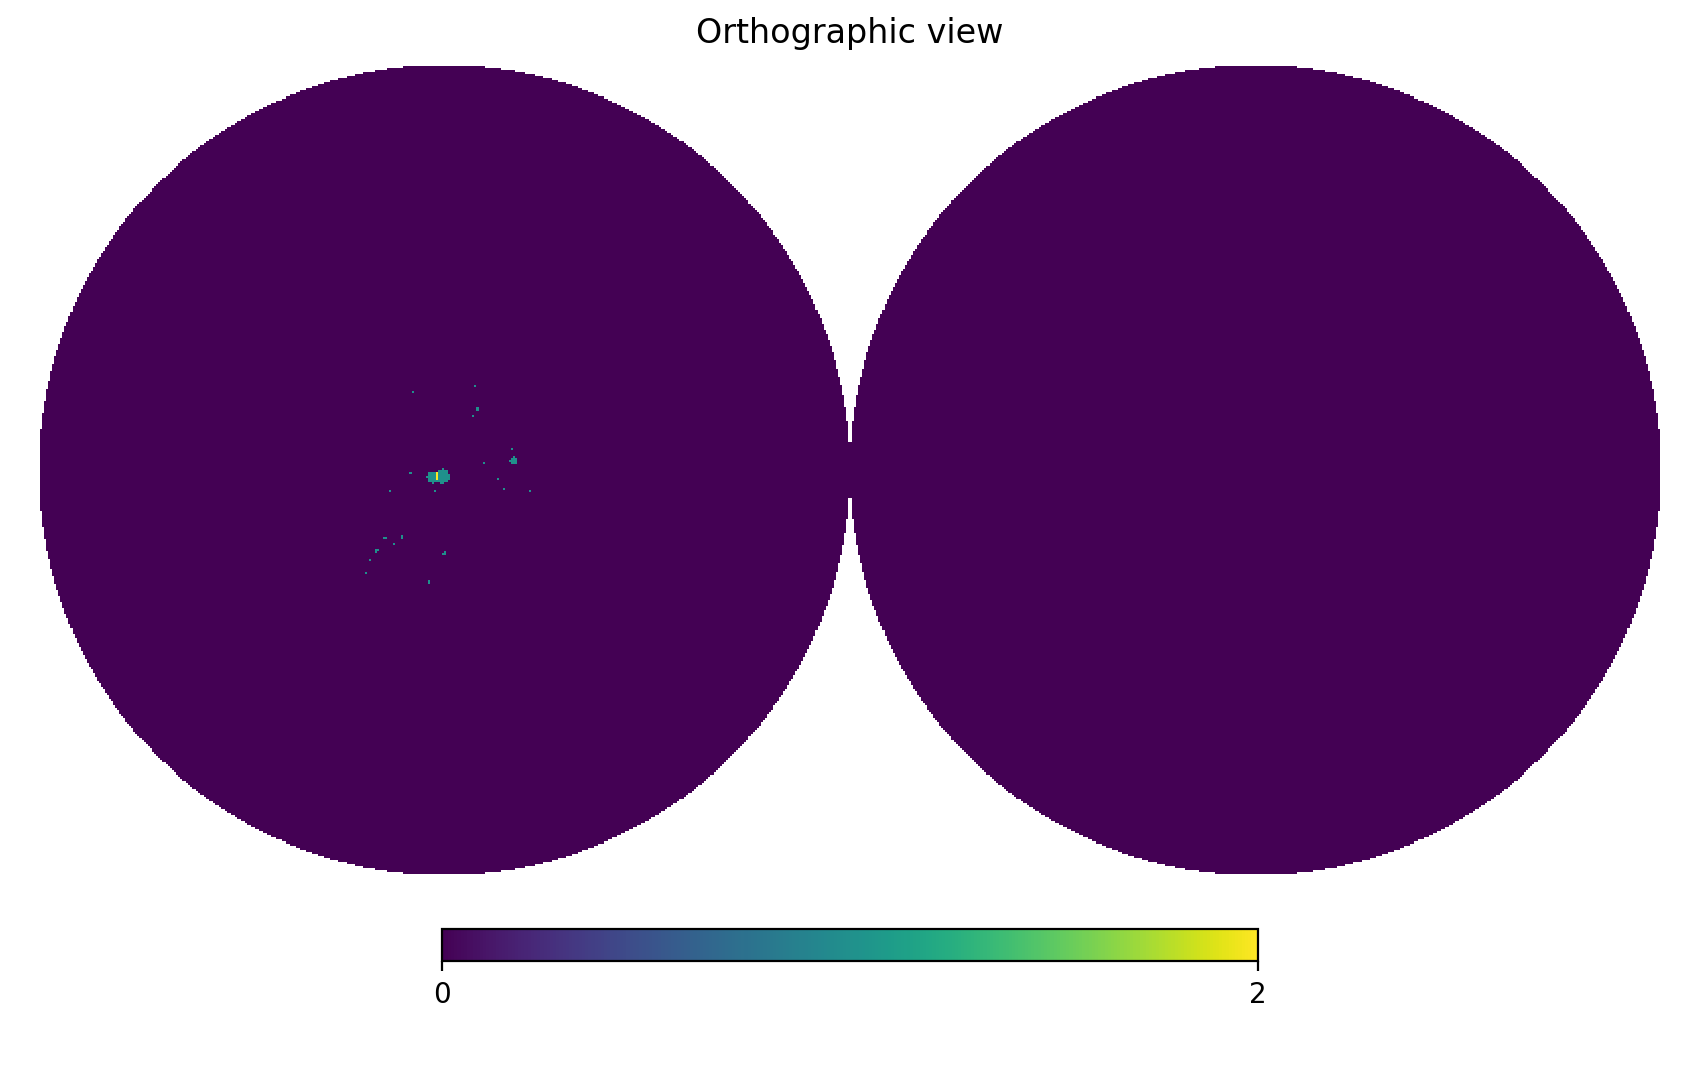

In [113]:
h.orthview(cluster_map,rot=(0,90))

In [114]:
dist={}
for idx in summary_cat["Catalogue"].keys():
    dist[idx]=[]
    for jdx in summary_cat["Catalogue"].keys():
        galcoord1=summary_cat["Catalogue"][idx]["mp_gal_coord"]
        galcoord2=summary_cat["Catalogue"][jdx]["mp_gal_coord"]
        dist[idx]=dist[idx] + [etcc.return_distance(galcoord1,galcoord2)]
        

In [115]:
for idx in summary_cat["Catalogue"].keys():
    print sort(dist[idx])[1:6]/summary_cat["Catalogue"][idx]["mp_thetac"]

[1.59748999 2.33709331 2.46191213 2.86496024 3.77726371]
[ 1.8070288   7.58423209  7.9430174  13.41672269 15.93127958]
[19.19007166 27.80123644 32.45448821 34.76402414 37.16112675]
[ 7.58659208 21.44855261 22.38509527 32.23374929 40.69284545]
[17.034053   19.98150233 20.04626384 25.27195026 27.76487607]
[ 3.28880674 10.12740436 11.97532211 19.32320949 19.85593325]
[ 7.9430174   8.29319586 12.01126819 18.63512949 20.89854423]
[ 30.23083436  67.1652508  111.04915382 118.31452795 121.31269895]
[59.61918549 64.00971531 81.48326231 87.40718625 89.65103778]
[ 78.34783345  95.14479011  97.17706623 100.94837161 113.40179591]
[ 19.73284045  74.48896615  90.9045566  100.94837161 118.31452795]
[ 26.5530723   95.14479011  97.50822994 139.37115383 155.66509532]
[ 30.23083436  97.30432753 116.32757413 120.66067999 126.41731306]
[ 6.20357064  6.57891766  6.87735661  8.51403892 10.11459069]
[ 9.48221715 13.22556321 13.42713625 17.7506943  28.50286055]
[3.40278099 5.89964614 7.61411724 7.66220164 8.911

In [126]:
cluspath=gset.mmfset.paths["result_figs"] + tilename + "/"
cmd="convert -delay 50 " + cluspath + "*{01.." + str(len(tmplt.theta500)-2) + "}.jpeg " 
cmd = cmd + "-delay 200 " + cluspath + "*" + str(len(tmplt.theta500)-1) + ".jpeg " + cluspath + tilename + "def.gif"

In [145]:
# cmd="convert -delay 50 "
# for ith in range(len(tmplt.theta500)):
#     filename=cluspath + tilename + "_clusdet_iter" + str(ith).zfill(2) + ".jpeg"
#     if ith< len(tmplt.theta500):
#         cmd=cmd + filename + " "
#     else:
#         print ith,filename
#         cmd=cmd + "-delay 1000 " + filename + " "
# filename=cluspath + tilename + "_clusdet.gif"
# cmd=cmd + filename
# os.system(cmd)

0